<a href="https://colab.research.google.com/github/sergey031/DZ_MLP/blob/master/%C3%90%C2%9F%C3%90%C2%A0_1_2_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практическая работа 1-2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [9]:
%matplotlib inline
import pandas as pd
pd.__version__

'1.5.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [8]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [7]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)

last_10_rows = df.tail(10)
print(last_10_rows)

       age      workclass  fnlwgt      education  education.num  \
32551   32        Private   34066           10th              6   
32552   43        Private   84661      Assoc-voc             11   
32553   32        Private  116138        Masters             14   
32554   53        Private  321865        Masters             14   
32555   22        Private  310152   Some-college             10   
32556   27        Private  257302     Assoc-acdm             12   
32557   40        Private  154374        HS-grad              9   
32558   58        Private  151910        HS-grad              9   
32559   22        Private  201490        HS-grad              9   
32560   52   Self-emp-inc  287927        HS-grad              9   

            marital.status          occupation    relationship  \
32551   Married-civ-spouse   Handlers-cleaners         Husband   
32552   Married-civ-spouse               Sales         Husband   
32553        Never-married        Tech-support   Not-in-family  

2) Сколько колонок и сколько строк в этом датасете?

In [6]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)

num_rows, num_columns = df.shape

print(f"строк: {num_rows}")
print(f"колонок: {num_columns}")

строк: 32561
колонок: 15


3) Какие типы данных у элементов этого датасета?

In [5]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
data_types = df.dtypes

print(data_types)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


4) Какие признаки имеют пропуски?

In [4]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]

print(columns_with_missing_values)

Series([], dtype: int64)


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [2]:
import pandas as pd
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)

unique_workclass = df['workclass'].unique()

num_unique_workclass = len(unique_workclass)

print("Различных рабочих классов:", num_unique_workclass)
print("Список различных рабочих классов:", unique_workclass)

Различных рабочих классов: 9
Список различных рабочих классов: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


7) Какой средний возраст женщин и мужчин?

In [3]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)

average_age_by_gender = df.groupby('sex')['age'].mean()
print(average_age_by_gender)

sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

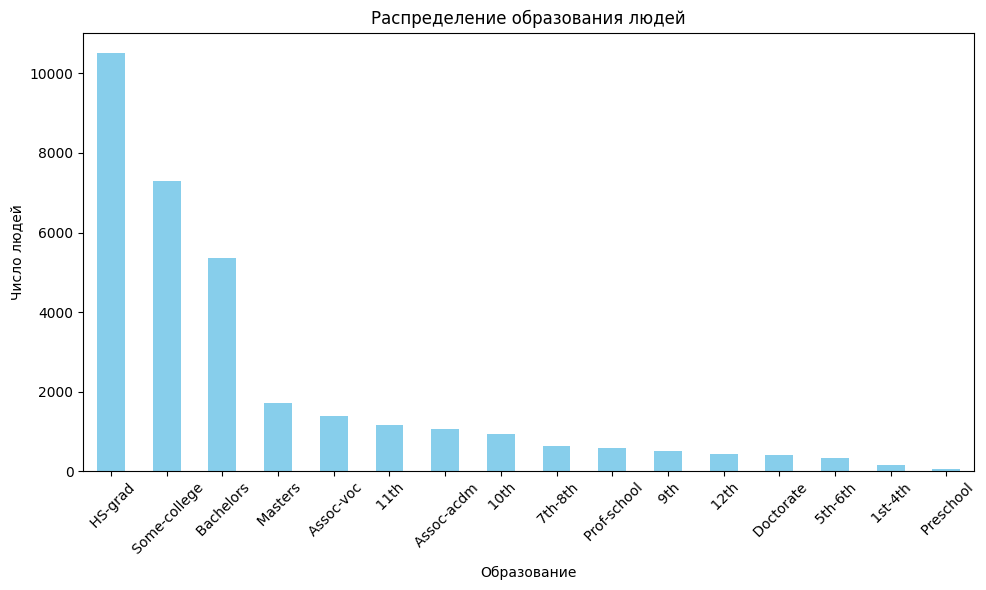

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
education_counts = df['education'].value_counts()

plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение образования людей')
plt.xlabel('Образование')
plt.ylabel('Число людей')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [14]:
import pandas as pd

columns = 'age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)

high_income_group = df[df['income'] == ' >50K']
low_income_group = df[df['income'] == ' <=50K']

avg_age_high_income = high_income_group['age'].mean()
std_age_high_income = high_income_group['age'].std()

avg_age_low_income = low_income_group['age'].mean()
std_age_low_income = low_income_group['age'].std()

print(f"Средний возраст для тех, кто получает более 50K в год: {avg_age_high_income:.2f} лет")
print(f"Среднеквадратичное отклонение возраста для тех, кто получает более 50K в год: {std_age_high_income:.2f} лет")

print(f"Средний возраст для тех, кто получает менее 50K в год: {avg_age_low_income:.2f} лет")
print(f"Среднеквадратичное отклонение возраста для тех, кто получает менее 50K в год: {std_age_low_income:.2f} лет")


Средний возраст для тех, кто получает более 50K в год: 44.25 лет
Среднеквадратичное отклонение возраста для тех, кто получает более 50K в год: 10.52 лет
Средний возраст для тех, кто получает менее 50K в год: 36.78 лет
Среднеквадратичное отклонение возраста для тех, кто получает менее 50K в год: 14.02 лет


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [16]:
import pandas as pd

columns = 'age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)

high_income_education_filter = ((df['income'] == ' >50K') & (df['education'].isin([' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate'])))

has_high_income_education = any(high_income_education_filter)

if has_high_income_education:
    print("Да, люди, которые получают больше 50K, имеют как минимум высшее образование.")
else:
    print("Нет, не все люди, которые получают больше 50K, имеют высшее образование.")


Да, люди, которые получают больше 50K, имеют как минимум высшее образование.


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [18]:
import pandas as pd

columns = 'age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)

married_categories = [' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse']
single_categories = [' Never-married', ' Separated', ' Divorced', ' Widowed']

married_high_income_filter = df[(df['marital.status'].isin(married_categories)) & (df['income'] == ' >50K')]
single_high_income_filter = df[(df['marital.status'].isin(single_categories)) & (df['income'] == ' >50K')]

married_high_income_ratio = len(married_high_income_filter) / len(df[df['marital.status'].isin(married_categories)])
single_high_income_ratio = len(single_high_income_filter) / len(df[df['marital.status'].isin(single_categories)])

if married_high_income_ratio > single_high_income_ratio:
    print("Среди женатых мужчин больше доля зарабатывающих много (>50K).")
elif married_high_income_ratio < single_high_income_ratio:
    print("Среди холостых мужчин больше доля зарабатывающих много (>50K).")
else:
    print("Доли зарабатывающих много (>50K) среди женатых и холостых мужчин равны.")


Среди женатых мужчин больше доля зарабатывающих много (>50K).


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [20]:
import pandas as pd

columns = 'age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)

result = df.groupby(['native.country', 'income'])['hours.per.week'].mean().unstack()

print(result)


income                           <=50K       >50K
native.country                                   
 ?                           40.164760  45.547945
 Cambodia                    41.416667  40.000000
 Canada                      37.914634  45.641026
 China                       37.381818  38.900000
 Columbia                    38.684211  50.000000
 Cuba                        37.985714  42.440000
 Dominican-Republic          42.338235  47.000000
 Ecuador                     38.041667  48.750000
 El-Salvador                 36.030928  45.000000
 England                     40.483333  44.533333
 France                      41.058824  50.750000
 Germany                     39.139785  44.977273
 Greece                      41.809524  50.625000
 Guatemala                   39.360656  36.666667
 Haiti                       36.325000  42.750000
 Holand-Netherlands          40.000000        NaN
 Honduras                    34.333333  60.000000
 Hong                        39.142857  45.000000


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [22]:
import pandas as pd
import numpy as np

columns = 'age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)

df['capital.diff'] = df['capital.gain'] - df['capital.loss']

def categorize_capital_diff(value):
    if value == 0:
        return 'No Gain/Loss'
    elif value > 0 and value <= 1000:
        return 'Small Gain'
    elif value > 1000 and value <= 5000:
        return 'Medium Gain'
    elif value > 5000:
        return 'High Gain'
    elif value < 0 and value >= -1000:
        return 'Small Loss'
    elif value < -1000 and value >= -5000:
        return 'Medium Loss'
    elif value < -5000:
        return 'High Loss'

df['capital.diff.category'] = df['capital.diff'].apply(categorize_capital_diff)

pivot_table = pd.pivot_table(df, values='capital.diff', index='education', columns='capital.diff.category', aggfunc='count', fill_value=0)

print(pivot_table)


capital.diff.category  High Gain  Medium Gain  Medium Loss  No Gain/Loss  \
education                                                                  
 10th                         10           28           27           865   
 11th                         21           27           31          1089   
 12th                          8           11            8           403   
 1st-4th                       1            4            4           159   
 5th-6th                       5            9           11           308   
 7th-8th                       8           33           22           582   
 9th                           3           24            8           474   
 Assoc-acdm                   49           33           52           930   
 Assoc-voc                    71           61           52          1194   
 Bachelors                   486          144          332          4384   
 Doctorate                    64           11           53           284   
 HS-grad    

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [24]:
import pandas as pd

columns = 'age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)

female_high_income = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]

pivot_table = pd.pivot_table(female_high_income, values='income', index='native.country', aggfunc='count', fill_value=0)

max_avg_income_country = pivot_table.idxmax().values[0]
max_avg_income_count = pivot_table.max().values[0]

print(f"Женщины из страны '{max_avg_income_country}' получают в среднем большую зарплату (>50K) чаще, {max_avg_income_count} раз.")


Женщины из страны ' United-States' получают в среднем большую зарплату (>50K) чаще, 1072 раз.


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary